In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv("../Caso Datafest/Datafest2024_Test.csv")

In [32]:
data.index = pd.to_datetime(data["fecha_transaccion"], format="%Y%m%d")

In [33]:
data.sort_index()

,fecha_transaccion,codigo_cajero,tipo_cajero,saldo_inicial,demanda,abastecimiento,saldo_final
fecha_transaccion,,,,,,,
2024-04-15,20240415,698,A,40170.0,1010.0,375680.0,414840.0
2024-04-15,20240415,242,B,38690.0,34340.0,533390.0,537740.0
2024-04-15,20240415,239,B,30710.0,29860.0,271230.0,272080.0
2024-04-15,20240415,236,B,43720.0,17580.0,365980.0,392120.0
2024-04-15,20240415,235,B,8980.0,54070.0,415920.0,370830.0
...,...,...,...,...,...,...,...
2024-05-26,20240526,504,A,NaN,NaN,NaN,NaN
2024-05-26,20240526,503,A,NaN,NaN,NaN,NaN
2024-05-26,20240526,495,A,NaN,NaN,NaN,NaN


In [34]:
df = data.groupby("codigo_cajero").get_group(1).sort_index().dropna()
df

,fecha_transaccion,codigo_cajero,tipo_cajero,saldo_inicial,demanda,abastecimiento,saldo_final
fecha_transaccion,,,,,,,
2024-04-15,20240415,1,B,17610.0,18020.0,279240.0,278830.0
2024-04-16,20240416,1,B,278830.0,-45390.0,0.0,324220.0
2024-04-17,20240417,1,B,324220.0,251490.0,333620.0,406350.0
2024-04-18,20240418,1,B,406350.0,22690.0,209550.0,593210.0
2024-04-19,20240419,1,B,593210.0,350990.0,0.0,242220.0
2024-04-20,20240420,1,B,242220.0,195390.0,0.0,46830.0
2024-04-21,20240421,1,B,46830.0,16140.0,0.0,30690.0
2024-04-22,20240422,1,B,30690.0,16880.0,518440.0,532250.0
2024-04-23,20240423,1,B,532250.0,5540.0,0.0,526710.0


In [35]:
def get_variables(tipo: str):
    variable_cost = 0.1
    max_capacity = 1_000_000
    dias = [1,2,5]
    if tipo == "B":
        variable_cost = 0.15
        max_capacity = 1_300_000
        dias = [1,3,4]
    limite = 0.2 * max_capacity
    return variable_cost, max_capacity, dias, limite

In [47]:
df

,fecha_transaccion,codigo_cajero,tipo_cajero,saldo_inicial,demanda,abastecimiento,saldo_final,day,Optimizado,Optimizacion
fecha_transaccion,,,,,,,,,,
2024-04-15,2024-04-15,1,B,17610.0,18020.0,279240.0,278830.0,1,294000,294000
2024-04-16,2024-04-16,1,B,278830.0,-45390.0,0.0,324220.0,2,294000,294000
2024-04-17,2024-04-17,1,B,324220.0,251490.0,333620.0,406350.0,3,294000,294000
2024-04-18,2024-04-18,1,B,406350.0,22690.0,209550.0,593210.0,4,294000,294000
2024-04-19,2024-04-19,1,B,593210.0,350990.0,0.0,242220.0,5,294000,294000
2024-04-20,2024-04-20,1,B,242220.0,195390.0,0.0,46830.0,6,294000,294000
2024-04-21,2024-04-21,1,B,46830.0,16140.0,0.0,30690.0,7,294000,294000
2024-04-22,2024-04-22,1,B,30690.0,16880.0,518440.0,532250.0,1,294000,294000
2024-04-23,2024-04-23,1,B,532250.0,5540.0,0.0,526710.0,2,294000,294000


C:\Users\HP\AppData\Local\Temp\ipykernel_20404\647334128.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dia = df["day"][pos]
C:\Users\HP\AppData\Local\Temp\ipykernel_20404\647334128.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dia = df["day"][pos]


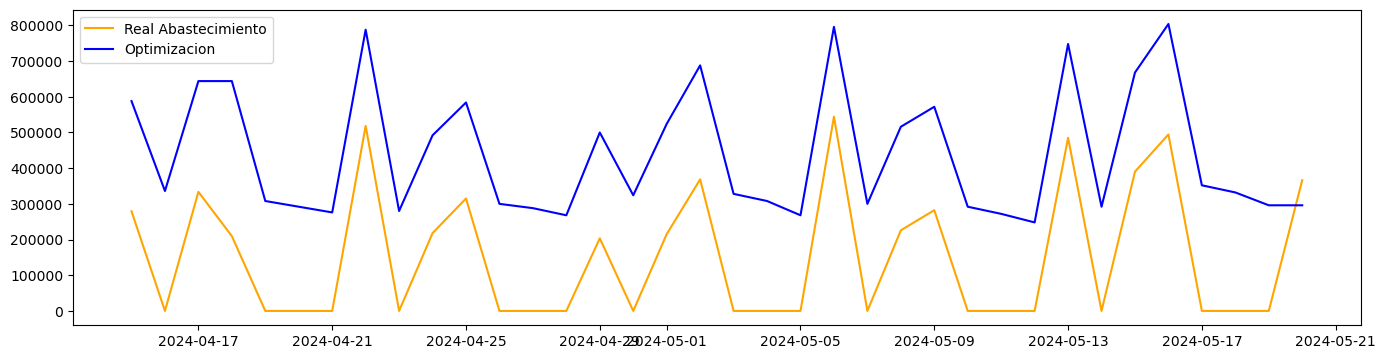

In [53]:
#df = pd.read_csv("./demand.csv")
df["fecha_transaccion"] = pd.to_datetime(df["fecha_transaccion"], format="%Y%m%d")
df["day"] = df["fecha_transaccion"].dt.day_of_week + 1

variable_cost, max_capacity, dias, limite = get_variables("B")

n_rows = len(df)
states = [(soles) for soles in range(0, max_capacity + 1, 4000)]
n_states = len(states)

cost_table = np.zeros(shape=(n_rows, n_states))

def calculate_cost(abastecimiento, predictec_demand, saldo_inicial, dia, pos):
    cost_exceso_soles = abastecimiento - (saldo_inicial - predictec_demand)
    total_cost = 0
    if cost_exceso_soles < limite:
        total_cost = 1000000
    else:
        total_cost = cost_exceso_soles * 0.05 + (saldo_inicial - predictec_demand - abastecimiento) * 0.05
    return total_cost

# Programación dinámica para minimizar los costos
for pos in range(n_rows):
    predicted_demand = df['demanda'].iloc[pos]
    saldo_inicial = df['saldo_inicial'].iloc[pos]
    dia = df["day"][pos]
    for i, (abastecimiento) in enumerate(states):
        if dia not in dias:
            cost_table[pos, i] = 0
        elif pos == 0:
            cost_table[pos, i] = calculate_cost(abastecimiento, predicted_demand, saldo_inicial, dia, pos)
        else:
            costs = []
            for j, _ in enumerate(states):
                transition_cost = calculate_cost(abastecimiento, predicted_demand, saldo_inicial, dia, pos)
                costs.append(cost_table[pos-1, j] + transition_cost)
            cost_table[pos, i] = min(costs)

# Obtener la secuencia de niveles de efectivo que minimiza los costos
optimal_soles_levels = []
optimal_state_idx = np.argmin(cost_table[-1, :])

for pos in reversed(range(n_rows)):
    optimal_soles_levels.append(states[optimal_state_idx])
    saldo_inicial = df["saldo_inicial"].iloc[pos]
    dia = df["day"][pos]
    if pos > 0:
        next_cost = cost_table[pos, optimal_state_idx]
        optimal_state_idx = np.argmin(
            [
                cost_table[pos-1, j] 
                + calculate_cost(
                    states[j],
                    df["demanda"].iloc[pos],
                    saldo_inicial,
                    dia,
                    pos,
                )
                for j in range(n_states)
            ]
        )
optimal_soles_levels.reverse()

# Agregar los niveles optimizados al dataframe
df['Optimizacion'] = optimal_soles_levels

plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.plot(
    df.index, 
    df['abastecimiento'], 
    label='Real Abastecimiento', 
    color='orange'
)
plt.plot(df.index, df["Optimizacion"], label="Optimizacion", color="blue")
plt.legend()
plt.tight_layout()
plt.show()